In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import lightgbm as lgb
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import style

In [2]:
#Import data
path = "/home/marius/Documents/Github projects/Summer-Internship/Time regression gbm"

data = pd.read_csv(path)

In [56]:
s_path = "/home/marius/Documents/MTD_Plots"

In [3]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
len(list(data))

13

In [5]:
#One-hot encoding
enc_data = pd.get_dummies(data)

In [19]:
enc_data

,Priority,Urgency,Project related,Company,Made SLA,Hypercare related,Completion Time,Solution category_Change Request,Solution category_Data update,Solution category_Explanation,...,Assignment group_ENT-SAP-FIN,Assignment group_ENT-SAP-SAM,Assignment group_ENT-SAP-SCM,Assignment group_ENT-SAP-SCM-DOM,Assignment group_ENT-SAP-SCM-PLA,Assignment group_ENT-SAP-SCM-SOU,Assignment group_ENT-SAP-SVC,Assignment group_ENT-SAP-SVC-COC,Assignment group_ENT-SAP-SVC-EXE,Assignment group_ENT-SAP-SVC-MAN
0,5,3,0,4602,1,0,11.902222,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5,3,0,501,1,0,1.616389,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,3,0,4602,1,0,0.436389,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5,3,0,4602,1,0,0.934167,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,1,0,4603,1,0,19.408056,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,5,3,0,4602,1,0,1.238889,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,5,3,0,105,1,0,1.049444,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,3,2,0,101,1,0,44.276389,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,3,2,0,101,1,0,2.152222,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,4,2,0,4602,1,0,0.868056,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [6]:
for i in range(7, 59):
    enc_data.iloc[:, i] = enc_data.iloc[:, i].astype(int)

In [21]:
#Splitting the labels from the rest of the data

y = enc_data.iloc[:, 7]
x = enc_data.drop("Completion Time", axis=1)

In [22]:
#Splitting into train and test data

x, x_test, y, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
categoricals = ['Solution category_Change Request',
 'Solution category_Data update',
 'Solution category_Explanation',
 'Solution category_Other ticket',
 'Solution category_Parameter change',
 'Solution category_Permissions',
 'Solution category_Restart',
 'Solution category_Software installation',
 'Solution category_Software reset',
 'Solution category_Unsolved',
 'Solution category_Workaround',
 'Close code_Not Solved (Cancelled by caller)',
 'Close code_Not Solved (No reply from caller)',
 'Close code_Not Solved (Not Reproducible)',
 'Close code_Not Solved (Other ticket)',
 'Close code_Solved (Permanently)',
 'Close code_Solved (Work Around)',
 'Escalation_Normal',
 'Escalation_Overdue',
 'Subcategory_Basis issue',
 'Subcategory_Coding issue',
 'Subcategory_Configuration issue',
 'Subcategory_Connectivity',
 'Subcategory_Deployment issue',
 'Subcategory_Design issue (business)',
 'Subcategory_Design issue (technical)',
 'Subcategory_Enhancement request',
 'Subcategory_Installation',
 'Subcategory_Operating System',
 'Subcategory_Peripherals',
 'Subcategory_Permission',
 'Subcategory_Regression impact',
 'Subcategory_Server',
 'Subcategory_Service request',
 'Subcategory_Software Issue',
 'Subcategory_System Administration',
 'Subcategory_Technical issue',
 'Subcategory_Training need',
 'Service Area_SAP SVC - Contact Center',
 'Service Area_SAP SVC - Service Execution',
 'Service Area_SAP SVC - Service Management',
 'Assignment group_ENT-IS-MOB-IFA',
 'Assignment group_ENT-SAP-FIN',
 'Assignment group_ENT-SAP-SAM',
 'Assignment group_ENT-SAP-SCM',
 'Assignment group_ENT-SAP-SCM-DOM',
 'Assignment group_ENT-SAP-SCM-PLA',
 'Assignment group_ENT-SAP-SCM-SOU',
 'Assignment group_ENT-SAP-SVC',
 'Assignment group_ENT-SAP-SVC-COC',
 'Assignment group_ENT-SAP-SVC-EXE',
 'Assignment group_ENT-SAP-SVC-MAN']

In [24]:
for num in x.iloc[:, -1]:
    if not isinstance(num, int):
        print("nan")

In [25]:
train_data = lgb.Dataset(x, label = y)
test_data = lgb.Dataset(x_test, label=y_test)

In [26]:
parameters = {
    'application': 'regression',
    'objective': 'regression',
    'metric': 'l2',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}


In [34]:
#Model with no outliers removed

model_nat = lgb.train(parameters,
                       train_data,
                       num_boost_round=5000)

In [66]:
model_test = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l2: 0.0686274
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 0.0619592
[3]	valid_0's l2: 0.0559046
[4]	valid_0's l2: 0.0504746
[5]	valid_0's l2: 0.0455723
[6]	valid_0's l2: 0.0411461
[7]	valid_0's l2: 0.0387701
[8]	valid_0's l2: 0.037888
[9]	valid_0's l2: 0.034253
[10]	valid_0's l2: 0.0317838
[11]	valid_0's l2: 0.0287401
[12]	valid_0's l2: 0.0278124
[13]	valid_0's l2: 0.027291
[14]	valid_0's l2: 0.0246457
[15]	valid_0's l2: 0.0222701
[16]	valid_0's l2: 0.0201727
[17]	valid_0's l2: 0.0182772
[18]	valid_0's l2: 0.0165637
[19]	valid_0's l2: 0.0156168
[20]	valid_0's l2: 0.0141177
[21]	valid_0's l2: 0.0127875
[22]	valid_0's l2: 0.0123062
[23]	valid_0's l2: 0.0121461
[24]	valid_0's l2: 0.0115783
[25]	valid_0's l2: 0.0105025
[26]	valid_0's l2: 0.0101889
[27]	valid_0's l2: 0.00924772
[28]	valid_0's l2: 0.0089763
[29]	valid_0's l2: 0.0081445
[30]	valid_0's l2: 0.00740566
[31]	valid_0's l2: 0.00735112
[32]	valid_0's l2: 0.00668617
[33]	valid_0's l2

[302]	valid_0's l2: 0.000109303
[303]	valid_0's l2: 0.000108498
[304]	valid_0's l2: 0.000108526
[305]	valid_0's l2: 0.000107796
[306]	valid_0's l2: 0.000107613
[307]	valid_0's l2: 0.000106904
[308]	valid_0's l2: 0.000106532
[309]	valid_0's l2: 0.00010586
[310]	valid_0's l2: 0.000105971
[311]	valid_0's l2: 0.000105218
[312]	valid_0's l2: 0.000105051
[313]	valid_0's l2: 0.000104176
[314]	valid_0's l2: 0.000103784
[315]	valid_0's l2: 0.00010381
[316]	valid_0's l2: 0.000103668
[317]	valid_0's l2: 0.000103613
[318]	valid_0's l2: 0.000103137
[319]	valid_0's l2: 0.000102707
[320]	valid_0's l2: 0.000102575
[321]	valid_0's l2: 0.000101573
[322]	valid_0's l2: 0.000101872
[323]	valid_0's l2: 0.000101828
[324]	valid_0's l2: 0.000101645
[325]	valid_0's l2: 0.000101163
[326]	valid_0's l2: 0.000101034
[327]	valid_0's l2: 0.000101147
[328]	valid_0's l2: 0.000100607
[329]	valid_0's l2: 0.000100466
[330]	valid_0's l2: 0.000100356
[331]	valid_0's l2: 9.95007e-05
[332]	valid_0's l2: 9.91716e-05
[333]	vali

[811]	valid_0's l2: 4.45369e-05
[812]	valid_0's l2: 4.46061e-05
[813]	valid_0's l2: 4.46845e-05
[814]	valid_0's l2: 4.47071e-05
[815]	valid_0's l2: 4.47814e-05
[816]	valid_0's l2: 4.4726e-05
[817]	valid_0's l2: 4.46698e-05
[818]	valid_0's l2: 4.4606e-05
[819]	valid_0's l2: 4.45619e-05
[820]	valid_0's l2: 4.46425e-05
[821]	valid_0's l2: 4.4582e-05
[822]	valid_0's l2: 4.46308e-05
[823]	valid_0's l2: 4.47798e-05
[824]	valid_0's l2: 4.49361e-05
[825]	valid_0's l2: 4.49083e-05
[826]	valid_0's l2: 4.48124e-05
[827]	valid_0's l2: 4.46891e-05
[828]	valid_0's l2: 4.45692e-05
[829]	valid_0's l2: 4.44831e-05
[830]	valid_0's l2: 4.43765e-05
[831]	valid_0's l2: 4.42669e-05
[832]	valid_0's l2: 4.43272e-05
[833]	valid_0's l2: 4.43679e-05
[834]	valid_0's l2: 4.43889e-05
[835]	valid_0's l2: 4.43294e-05
[836]	valid_0's l2: 4.43174e-05
[837]	valid_0's l2: 4.43293e-05
[838]	valid_0's l2: 4.4378e-05
[839]	valid_0's l2: 4.43409e-05
[840]	valid_0's l2: 4.42355e-05
[841]	valid_0's l2: 4.41031e-05
[842]	valid_

[1267]	valid_0's l2: 3.14481e-05
[1268]	valid_0's l2: 3.14714e-05
[1269]	valid_0's l2: 3.14785e-05
[1270]	valid_0's l2: 3.14006e-05
[1271]	valid_0's l2: 3.1384e-05
[1272]	valid_0's l2: 3.12931e-05
[1273]	valid_0's l2: 3.12705e-05
[1274]	valid_0's l2: 3.13171e-05
[1275]	valid_0's l2: 3.12623e-05
[1276]	valid_0's l2: 3.13075e-05
[1277]	valid_0's l2: 3.12456e-05
[1278]	valid_0's l2: 3.11147e-05
[1279]	valid_0's l2: 3.11243e-05
[1280]	valid_0's l2: 3.10984e-05
[1281]	valid_0's l2: 3.10584e-05
[1282]	valid_0's l2: 3.09814e-05
[1283]	valid_0's l2: 3.09654e-05
[1284]	valid_0's l2: 3.09915e-05
[1285]	valid_0's l2: 3.1085e-05
[1286]	valid_0's l2: 3.11449e-05
[1287]	valid_0's l2: 3.10725e-05
[1288]	valid_0's l2: 3.10981e-05
[1289]	valid_0's l2: 3.1096e-05
[1290]	valid_0's l2: 3.11089e-05
[1291]	valid_0's l2: 3.11443e-05
[1292]	valid_0's l2: 3.11619e-05
[1293]	valid_0's l2: 3.1118e-05
[1294]	valid_0's l2: 3.11452e-05
[1295]	valid_0's l2: 3.11638e-05
[1296]	valid_0's l2: 3.12418e-05
[1297]	valid_0

[1696]	valid_0's l2: 2.43602e-05
[1697]	valid_0's l2: 2.43445e-05
[1698]	valid_0's l2: 2.42829e-05
[1699]	valid_0's l2: 2.43001e-05
[1700]	valid_0's l2: 2.42748e-05
[1701]	valid_0's l2: 2.42703e-05
[1702]	valid_0's l2: 2.4276e-05
[1703]	valid_0's l2: 2.42357e-05
[1704]	valid_0's l2: 2.42358e-05
[1705]	valid_0's l2: 2.41626e-05
[1706]	valid_0's l2: 2.41516e-05
[1707]	valid_0's l2: 2.4138e-05
[1708]	valid_0's l2: 2.40978e-05
[1709]	valid_0's l2: 2.40855e-05
[1710]	valid_0's l2: 2.40917e-05
[1711]	valid_0's l2: 2.40929e-05
[1712]	valid_0's l2: 2.40604e-05
[1713]	valid_0's l2: 2.40669e-05
[1714]	valid_0's l2: 2.40743e-05
[1715]	valid_0's l2: 2.40884e-05
[1716]	valid_0's l2: 2.40851e-05
[1717]	valid_0's l2: 2.40456e-05
[1718]	valid_0's l2: 2.40469e-05
[1719]	valid_0's l2: 2.40053e-05
[1720]	valid_0's l2: 2.40086e-05
[1721]	valid_0's l2: 2.3942e-05
[1722]	valid_0's l2: 2.39127e-05
[1723]	valid_0's l2: 2.38677e-05
[1724]	valid_0's l2: 2.38565e-05
[1725]	valid_0's l2: 2.38204e-05
[1726]	valid_

In [67]:
#Model_test

for idx, val in sorted(enumerate(model_test.feature_importance()), key=lambda x: x[1], reverse=True):
    print(x.columns.values[idx], val)

Company 6777
Priority 2053
Urgency 1376
Service Area_SAP SVC - Service Execution 1233
Assignment group_ENT-SAP-SVC-EXE 1210
Solution category_Explanation 1077
Subcategory_Technical issue 985
Service Area_SAP SVC - Service Management 851
Assignment group_ENT-SAP-SVC 791
Solution category_Change Request 778
Close code_Solved (Permanently) 738
Assignment group_ENT-SAP-SVC-MAN 670
Close code_Solved (Work Around) 495
Solution category_Data update 481
Subcategory_Coding issue 480
Solution category_Workaround 346
Service Area_SAP SVC - Contact Center 218
Subcategory_Enhancement request 192
Assignment group_ENT-SAP-SVC-COC 170
Subcategory_Design issue (technical) 62
Hypercare related 5
Project related 0
Made SLA 0
Solution category_Other ticket 0
Solution category_Parameter change 0
Solution category_Permissions 0
Solution category_Restart 0
Solution category_Software installation 0
Solution category_Software reset 0
Solution category_Unsolved 0
Close code_Not Solved (Cancelled by caller) 0
Cl

In [48]:
labels = []
y = []
for idx, val in sorted(enumerate(model_nat.feature_importance()), key=lambda x: x[1], reverse=True):
    print(x.columns.values[idx], val)
    labels += [x.columns.values[idx]]
    y += [val]

Company 19545
Priority 6242
Urgency 3933
Service Area_SAP SVC - Service Execution 3654
Assignment group_ENT-SAP-SVC-EXE 3584
Solution category_Explanation 2997
Subcategory_Technical issue 2793
Service Area_SAP SVC - Service Management 2347
Assignment group_ENT-SAP-SVC 2281
Close code_Solved (Permanently) 2003
Solution category_Change Request 1974
Assignment group_ENT-SAP-SVC-MAN 1937
Subcategory_Coding issue 1556
Close code_Solved (Work Around) 1402
Solution category_Data update 1212
Solution category_Workaround 959
Subcategory_Enhancement request 661
Service Area_SAP SVC - Contact Center 606
Assignment group_ENT-SAP-SVC-COC 514
Subcategory_Design issue (technical) 115
Hypercare related 5
Project related 0
Made SLA 0
Solution category_Other ticket 0
Solution category_Parameter change 0
Solution category_Permissions 0
Solution category_Restart 0
Solution category_Software installation 0
Solution category_Software reset 0
Solution category_Unsolved 0
Close code_Not Solved (Cancelled by c

In [49]:
labels = labels[:21]

In [61]:
string = "A B C D E F G H I J K L M N O P Q R S T U"
d = np.array(string.split())
len(d)

21

In [51]:
y = y[:21]

In [63]:
#Plotting function
def plot_bar(x, y, title, ylabel):
    plt.bar(x, y, align='center')
    plt.title(title)
    plt.ylabel(ylabel)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(s_path+title+'.png', dpi=100)

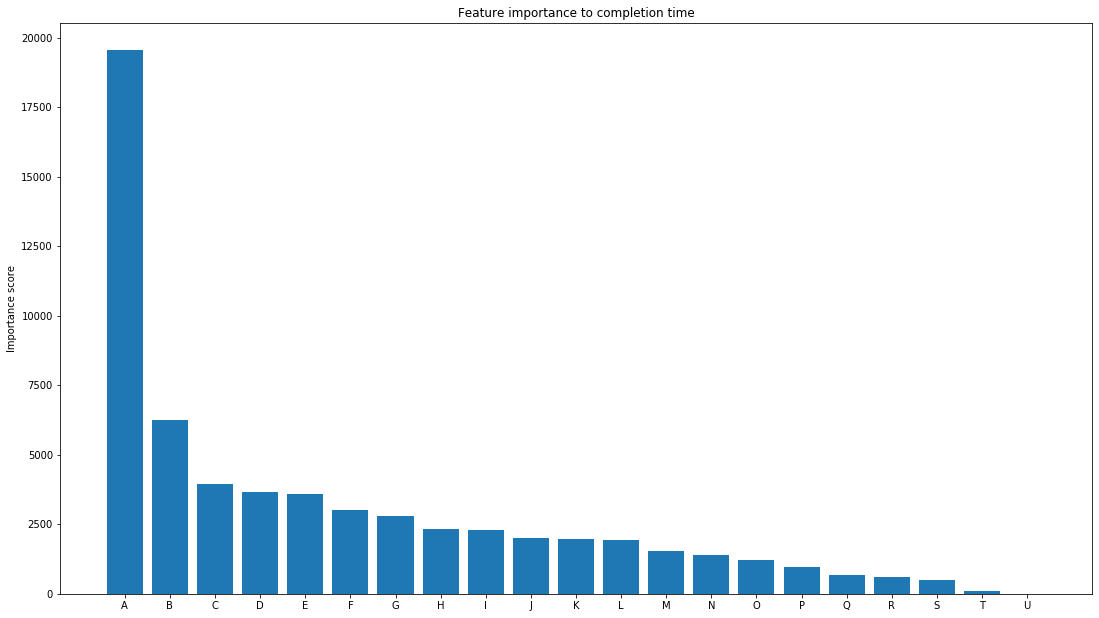

In [64]:
plot_bar(d, y, "Feature importance to completion time", "Importance score")